In [72]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
df_x = pd.read_csv('../DataSet KNN/xdata.csv')
df_y = pd.read_csv('../DataSet KNN/ydata.csv')

In [74]:
print(df_x.shape)

(399, 3)


In [75]:
print(df_y.shape)

(399, 2)


In [76]:
df_x

,0,3.4821055700010444,2.4203917879404533
0,1,3.516279,3.719750
1,2,4.606496,3.414379
2,3,4.677011,3.047244
3,4,4.157725,3.138677
4,5,3.154431,3.619858
...,...,...,...
394,395,1.389231,2.592584
395,396,-0.352768,0.136461
396,397,0.789626,0.931670
397,398,-1.002530,-0.676162


In [77]:
df_y

,0,0.0
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
394,395,1.0
395,396,1.0
396,397,1.0
397,398,1.0


In [78]:
# the data set contains points which are already label i.e. whether they belong to 0 class or 1 class
# df_x contain points as (x,y) . it also contains index we need to remove the index column
# df_y contains label of point i.e. 0 or 1 here also we need to remove index column

In [79]:
x = df_x.iloc[:,1:]
y = df_y.iloc[:,1]

In [80]:
x

,3.4821055700010444,2.4203917879404533
0,3.516279,3.719750
1,4.606496,3.414379
2,4.677011,3.047244
3,4.157725,3.138677
4,3.154431,3.619858
...,...,...
394,1.389231,2.592584
395,-0.352768,0.136461
396,0.789626,0.931670
397,-1.002530,-0.676162


In [81]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
394    1.0
395    1.0
396    1.0
397    1.0
398    1.0
Name: 0.0, Length: 399, dtype: float64

In [82]:
# we will convert the df_x and df_y dataframes into array cause the point which we will send for classifying will 
# also be treated as 
# an array rather than a dataframe

In [83]:
# generating numpy arrays
x = df_x.values
y = df_y.values

In [84]:
print(x)
# print(y) [ [1 0.], [2 0.] .... ]

[[ 1.00000000e+00  3.51627900e+00  3.71975047e+00]
 [ 2.00000000e+00  4.60649561e+00  3.41437943e+00]
 [ 3.00000000e+00  4.67701056e+00  3.04724443e+00]
 ...
 [ 3.97000000e+02  7.89625683e-01  9.31669806e-01]
 [ 3.98000000e+02 -1.00253042e+00 -6.76162472e-01]
 [ 3.99000000e+02  2.92386778e-01  5.61177823e-01]]


In [85]:
x = x[:,1:]
y = y[:,1:]
y = y.reshape((-1,))
# print(y)
# print(x)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [88]:
print(x.shape)
print(y.shape)


(399, 2)
(399,)


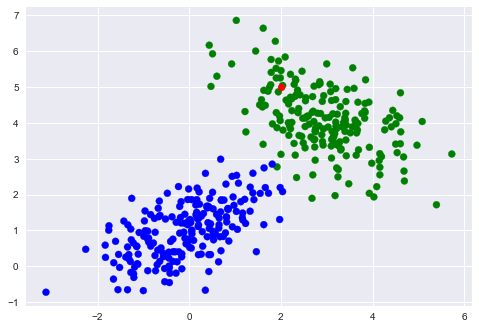

In [100]:
plt.style.use('seaborn')
colormap = np.array(['g','b'])
plt.scatter(x[:,0], x[:,1], c=colormap[y.astype(int)])

# lets find a point and try to classify it manually
query = [2,5]
plt.scatter(query[0], query[1], c='red')
# plt.show()
plt.show()

In [94]:
# plt.scatter?

In [101]:
# as we can see the point [2,5] clearly belongs to class 1 i.e. green

In [102]:
# let's write KNN code
# our basic idea will be to :
# 1. find distance (Eucledian) of all points from the query point 
# 2. sort all the distances we calculated
# 3. take the first K values from distance array (the being the closest points)
# 4. then, we'll find the maximum frequency class 
# 5. at end, the class which is occurring frequently will be the answer i.e. our point [2,5] will belong to that class

In [104]:
# let's write KNN code
# finding distance function

def distance(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [121]:
# KNN Algo

def knn(x, y, querypt, k=5):
    
    # lets define a array 'vals' which contains (distance_from_queryPoint, class_of_point_x[i])
    vals = []
    
    # lets traverse all rows (points) and compute distance
    # x.shape(0) => 0 indicates 399 values
    for i in range(x.shape[0]):
        d = distance(querypt, x[i])
        
        vals.append((d,y[i]))
    
    # sorting (ascending order) vals to take first K smallest distance from querypt
    vals = sorted(vals)
    vals = vals[:k]
    
    # finding unique values among vals array and also taking count for each unique value (uniq,count) in each value of new_vals
    # majority vote
    vals = np.array(vals)
    new_vals = np.unique(vals[:,1], return_counts=True)
    
    # just to verify 
    print(new_vals)
    
    # finding index using .argmax() of value havinf highest occurance
    index = new_vals[1].argmax()
    
    # mapping this index corresponding to its class 
    pred = new_vals[0][index]
    
    return pred
    
    

In [128]:
# testing for random point [1.7,3]
knn(x,y,[1.7,3])

(array([0., 1.]), array([3, 2], dtype=int64))


0.0

In [129]:
## Hope you undestood :)